In [1]:
from source_data import Requests
from utils import format_time
from ride_share import DATES,DAY_NAMES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# get the requests and measure volume per window
requests = Requests().read_requests()
requests.head()

,time,from_node,to_node,window,day,hour,latest_pickup
0,0,1167,1956,0,0,0,120
1,0,1669,1243,0,0,0,120
2,0,1609,1632,0,0,0,120
3,0,1092,910,0,0,0,120
4,0,1278,867,0,0,0,120


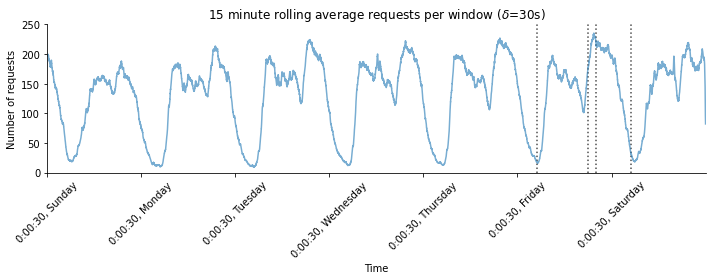

In [8]:
# summarise the requests by hour
numreqs_by_window = requests.groupby(['window']).agg('count')['time'].rename("num_requests")

# create a readable axis
# ticks are windows
xticks = range(0,int(60*60*24*7/30))
skippage = 1440*2
times_seconds = [ 30*w+30 for w in xticks[::skippage] ]

# labels should reflect date-times
xlabels = [f"{format_time((t//3600)%24,t)}, {DAY_NAMES[t//(3600*24)]}" for t in times_seconds]

# count the number of request picked up in each window
fig,ax = plt.subplots(figsize=[10,4])
numreqs_by_window.rolling(30).mean().plot(alpha=0.6,ax=ax)

# try to stick a line on Friday morning to Saturday mornging
day_offset = 120*5+1
focus_lower = 120*19+1
focus_upper = 120*21+1
v_lines = [5*24*120+day_offset,
           5*24*120+focus_lower,
           5*24*120+focus_upper,
           6*24*120+day_offset]
ax.vlines(v_lines,
          ymin=[0,0,0,0],
          ymax=[300,300,300,300],
          ls=":",
          color='black',
          alpha=0.7)

ax.set_title("15 minute rolling average requests per window ($\delta$=30s)")
ax.set_ylabel("Number of requests")
ax.set_xlabel("Time")

# TODO: just write the day name then write the details from-to times for the 
# "period of interest"
ax.set_xticks(xticks[::skippage])
ax.set_xticklabels(xlabels,rotation=45)
ax.set_ylim([0,250])
ax.set_xlim([0,20160])
sns.despine()
fig.tight_layout()
plt.savefig(r"results/count_allrequests.jpg")

In [ ]:
# TODO: show a close up of the analysis period